# Sentiment Analysis of Real-time Flipkart Product Reviews

**Objective**

The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.




**Dataset**

A team of Data Engineers have already scraped real-time data from Flipkart website. They followed the instructions given in this documentation for extracting user reviews. Don’t scrape your own data. Use the dataset given below to solve the problem statement.

The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.

In [ ]:
import os
import io

In [ ]:
import pandas as pd


In [ ]:
import zipfile

file_name = "/content/drive/MyDrive/reviews_data_dump.zip"

with zipfile.ZipFile(file_name, 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
df = pd.read_csv("/content/reviews_badminton/data.csv")

In [ ]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


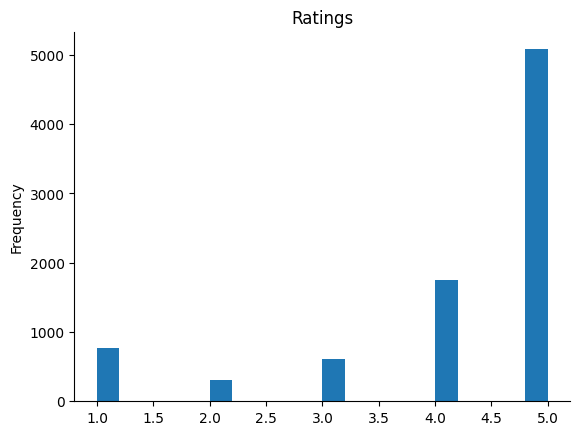

In [ ]:
# @title Ratings

from matplotlib import pyplot as plt
df['Ratings'].plot(kind='hist', bins=20, title='Ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
df['Reviews'] = df['Review Title'].astype(str).str.cat(df['Review text'].astype(str), sep='')

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Reviews
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,"Nice productNice product, good quality, but pr..."
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Don't waste your moneyThey didn't supplied Yon...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Did not meet expectationsWorst product. Damage...
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,"FairQuite O. K. , but nowadays the quality of..."
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Over pricedOver pricedJust â?¹620 ..from retai...


In [ ]:
df.shape

(8518, 9)

In [ ]:
df.loc[0, "Reviews"]

'Nice productNice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [ ]:
df.loc[1, "Reviews"]

"Don't waste your moneyThey didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE"

In [ ]:
df['Ratings'].value_counts(normalize=True)

5    0.596384
4    0.204978
1    0.090279
3    0.072200
2    0.036159
Name: Ratings, dtype: float64

In [ ]:
df['Ratings'] = df['Ratings'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Reviews
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",1,"Nice productNice product, good quality, but pr..."
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,0,Don't waste your moneyThey didn't supplied Yon...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,0,Did not meet expectationsWorst product. Damage...
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",0,"FairQuite O. K. , but nowadays the quality of..."
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,0,Over pricedOver pricedJust â?¹620 ..from retai...


In [ ]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1000,
               height=800).generate(' '.join(df['Reviews']))

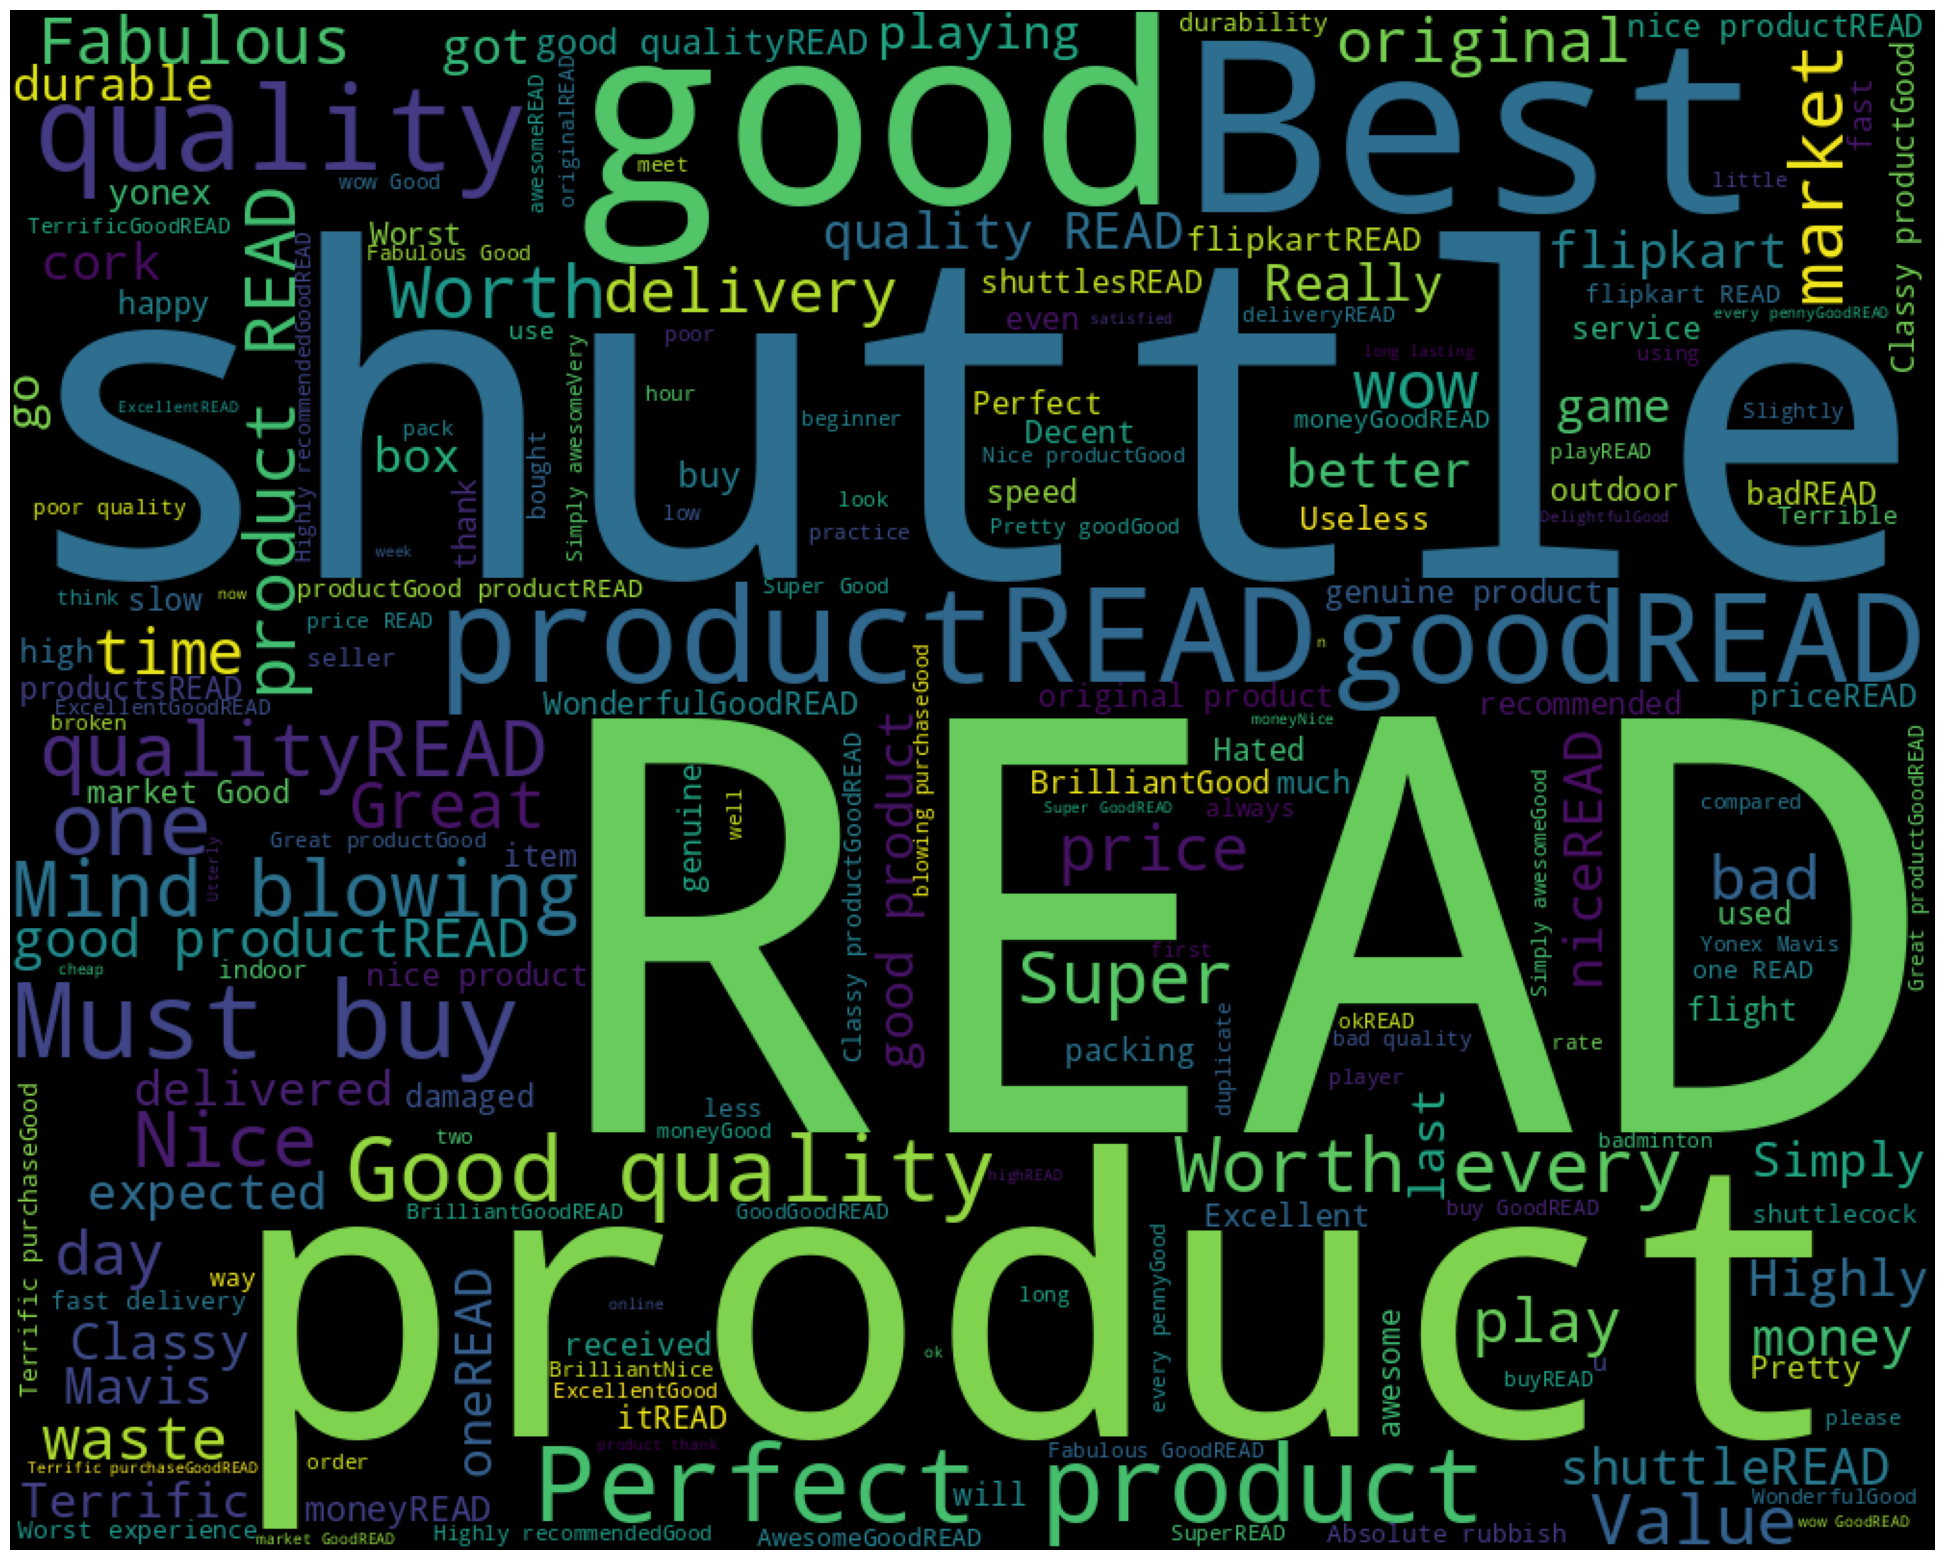

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

## Step 1 - Identify Input and Output

In [ ]:
X = df.Reviews
y = df.Ratings

In [ ]:
print(X.shape, y.shape)

(8518,) (8518,)


# Step 2 - Split the Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6388,) (6388,)
(2130,) (2130,)


## Step 3 - Data Preprocessing on train data (X_train)

In [ ]:
def display_wordcloud(data):
  wc = WordCloud(background_color="black",
                 width=1600,
                 height=800).generate(' '.join(data))
  plt.figure(1,figsize=(30,20))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

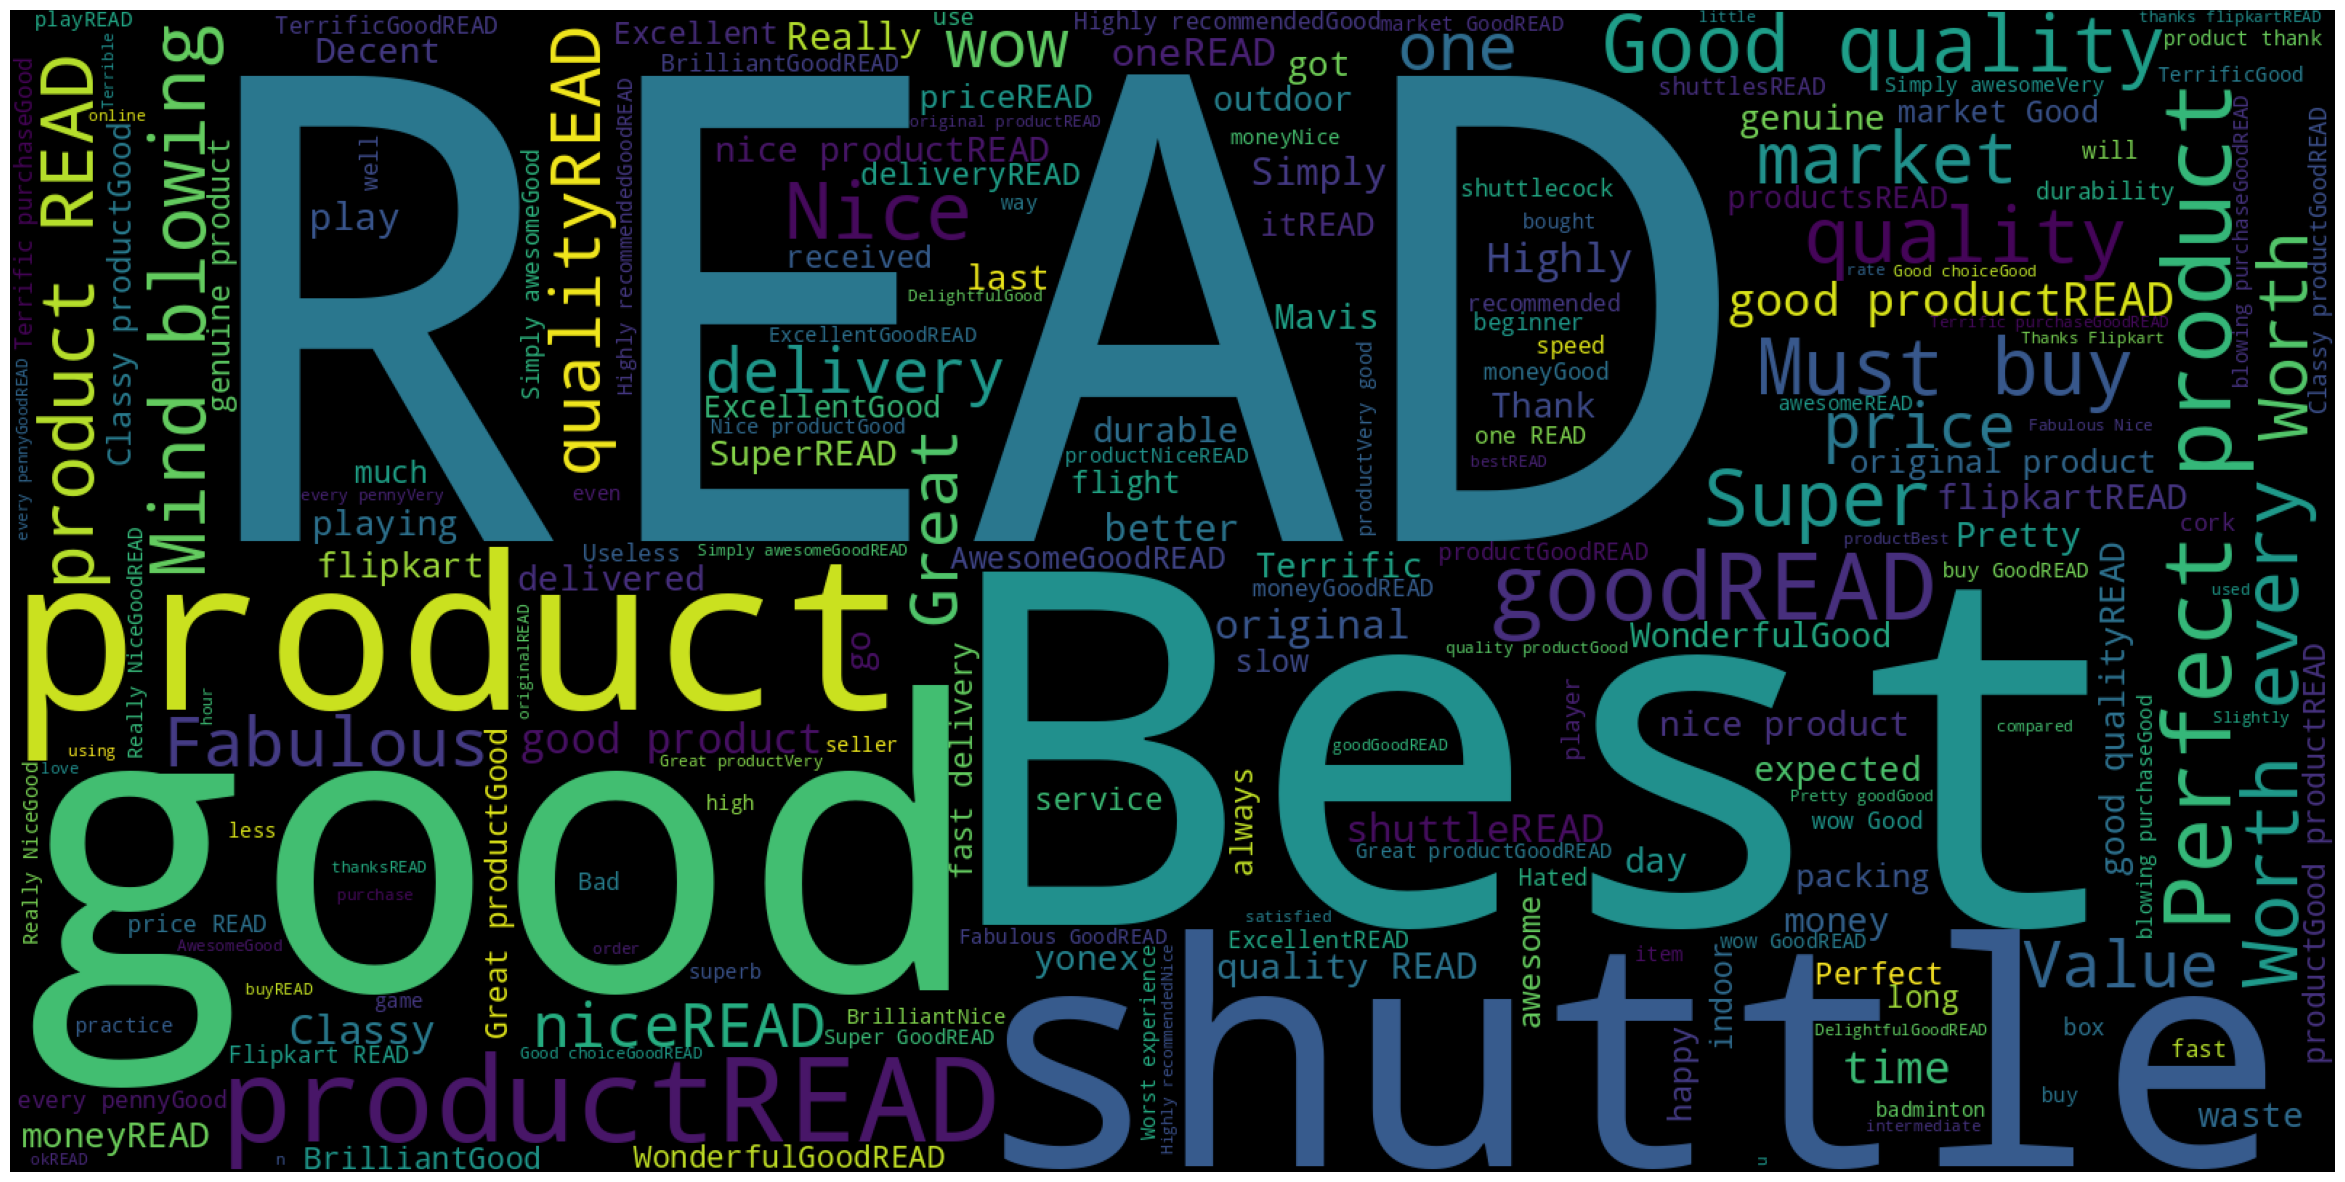

In [ ]:
display_wordcloud(X_train[y_train==1])

In [ ]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
def clean(doc):
  doc = doc.replace("</br>", " ")

  doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

  # Converting to lower case
  doc = doc.lower()

  # Tokenization
  tokens = nltk.word_tokenize(doc)

  # Lemmatize
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # Stop word removal
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

  # Join and return
  return " ".join(filtered_tokens)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 5.68 s, sys: 284 ms, total: 5.96 s
Wall time: 10.9 s
(6388, 4963)


In [ ]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: user 3.08 s, sys: 183 ms, total: 3.26 s
Wall time: 5.07 s


In [ ]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: user 1.04 s, sys: 73.9 ms, total: 1.11 s
Wall time: 1.57 s


In [ ]:
import joblib

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from joblib import Memory

# from sklearn.externals.joblib import Memory  # Import Memory from joblib module


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression(class_weight='balanced'))
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced', None]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 11.5 s, sys: 72.8 ms, total: 11.6 s
Wall time: 14.1 s
Score on Test Data:  0.912632164718976
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 35.6 s, sys: 142 ms, total: 35.8 s
Wall time: 36.1 s
Score on Test Data:  0.899837574445046
********** logistic_regression **********
Fitting 5 folds for each of 144 candidates, totalling 720 fits
CPU times: user 28min 38s, sys: 1.73 s, total: 28min 39s
Wall time: 28min 50s
Score on Test Data:  0.913372582001682


In [ ]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, l1_ratio=0.6, penalty='elasticnet',
                                    solver='saga'))])



In [ ]:
from sklearn import metrics


naive_bayes


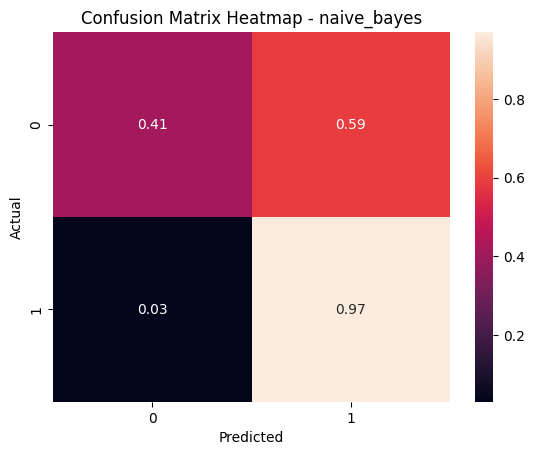


decision_tree


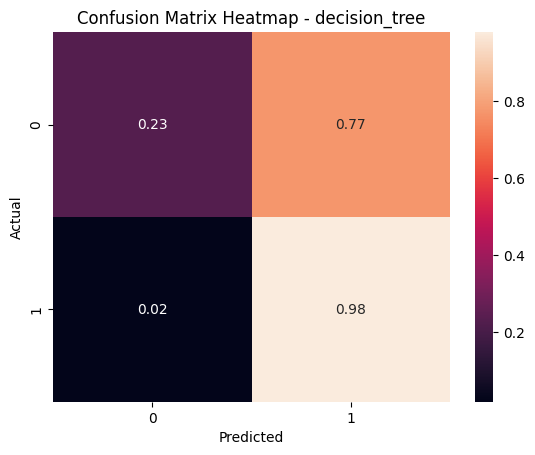


logistic_regression


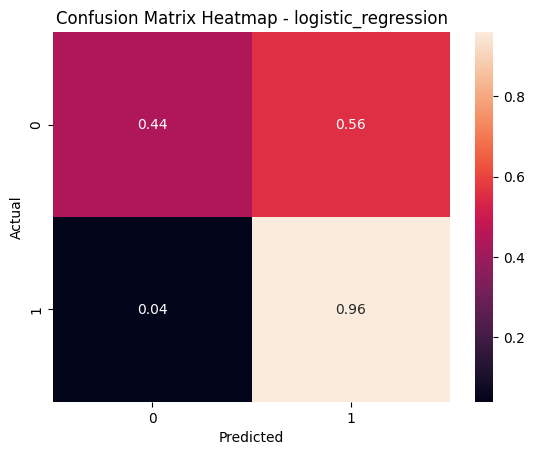

In [ ]:
import numpy as np
import seaborn as sns

for name, model in best_models.items():
    print()
    print(name)

    # Predictions on test data
    y_test_pred = model.predict(X_test_clean)

    # Calculate confusion matrix
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    actual = np.sum(cm, axis=1).reshape(-1, 1)
    cmn = np.round(cm / actual, 2)

    # Plot heatmap
    sns.heatmap(cmn, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix Heatmap - {name}')

    plt.show()

In [ ]:
import matplotlib.pyplot as plt

train_f1_scores = []
test_f1_scores = []

for name, model in best_models.items():
    print(""*10, name, ""*10)

    # Save the model
    joblib.dump(model, f'{name}.pkl')

    # Load the model
    model = joblib.load(f'{name}.pkl')

    # Predictions on test data
    y_test_pred = model.predict(X_test_clean)
    test_f1 = metrics.f1_score(y_test, y_test_pred)
    test_f1_scores.append(test_f1)

    # Predictions on train data (assuming X_train is available)
    y_train_pred = model.predict(X_train_clean)
    train_f1 = metrics.f1_score(y_train, y_train_pred)
    train_f1_scores.append(train_f1)

    print("F1 Score on Train Data:", train_f1)
    print("F1 Score on Test Data:", test_f1)

    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

 naive_bayes 
F1 Score on Train Data: 0.945211916173292
F1 Score on Test Data: 0.912632164718976
Model Size: 319495 Bytes
 decision_tree 
F1 Score on Train Data: 0.9178526391641146
F1 Score on Test Data: 0.899837574445046
Model Size: 114905 Bytes
 logistic_regression 
F1 Score on Train Data: 0.9668093200190204
F1 Score on Test Data: 0.913372582001682
Model Size: 200458 Bytes


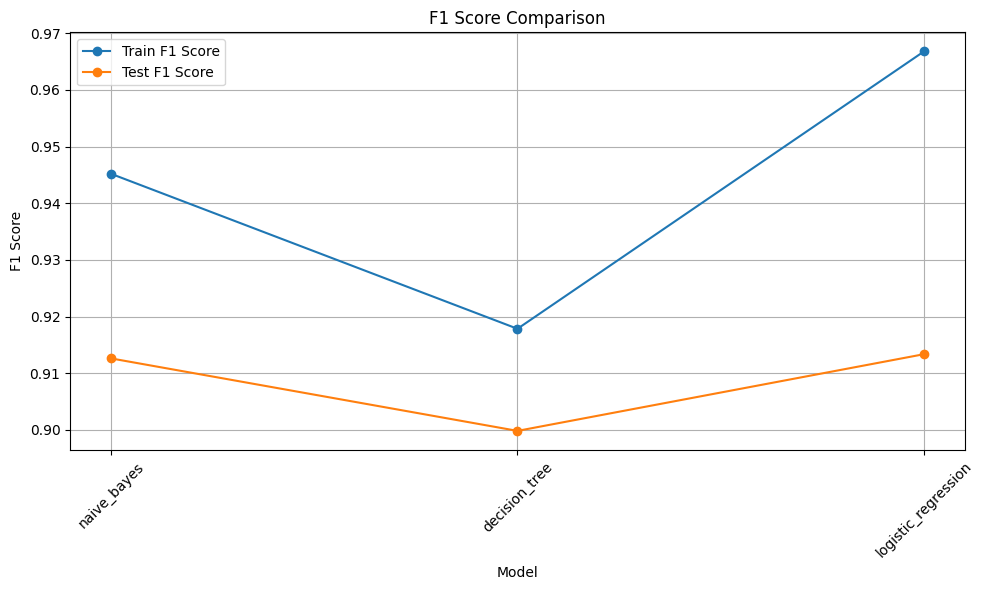

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(best_models.keys()), train_f1_scores, marker='o', label='Train F1 Score')
plt.plot(list(best_models.keys()), test_f1_scores, marker='o', label='Test F1 Score')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()